### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

In [1]:
import pandas as pd
import numpy as np

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [2]:
# 1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
ecommerce_df = pd.read_csv('./data/ecommerce_sales_data.csv')
display(ecommerce_df.head(5))

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


In [3]:
# 2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
# Missing value check
print(ecommerce_df.isna().sum())
print(ecommerce_df.describe()) 
# Replace missing DiscountRate to mean value (Q2:0.2, mean: 0.17)
ecommerce_df['DiscountRate'] = ecommerce_df['DiscountRate'].fillna(ecommerce_df['DiscountRate'].mean())
print(ecommerce_df.isna().sum())

OrderID         0
Product         0
Category        0
Quantity        0
Price           0
CustomerID      0
Birthdate       0
OrderDate       0
Country         0
DiscountRate    1
dtype: int64
          OrderID    Quantity         Price   CustomerID  DiscountRate
count  120.000000  120.000000    120.000000   120.000000    119.000000
mean    60.500000    2.941667  25625.000000  1469.158333      0.174286
std     34.785054    1.485481  14127.904624   272.327811      0.079315
min      1.000000    1.000000   5000.000000  1007.000000      0.060000
25%     30.750000    1.000000  13000.000000  1244.500000      0.090000
50%     60.500000    3.000000  25000.000000  1491.000000      0.200000
75%     90.250000    4.000000  38000.000000  1670.750000      0.230000
max    120.000000    5.000000  50000.000000  1982.000000      0.300000
OrderID         0
Product         0
Category        0
Quantity        0
Price           0
CustomerID      0
Birthdate       0
OrderDate       0
Country         0
Discou

In [4]:
# 3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

# Convert 'OrderDate' & 'Birthdate' type to datetime
ecommerce_df['OrderDate'] = pd.to_datetime(ecommerce_df['OrderDate'], format='%Y-%m-%d %H:%S')
ecommerce_df['Birthdate'] = pd.to_datetime(ecommerce_df['Birthdate'], format='%Y-%m-%d')
print(ecommerce_df[['OrderDate', 'Birthdate']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderDate  120 non-null    datetime64[ns]
 1   Birthdate  120 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.0 KB
None


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [5]:
# 1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
ecommerce_df['TotalRevenue'] = ecommerce_df['Quantity'] * ecommerce_df['Price']
ecommerce_df.head(2)

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:00:18,미국,0.14,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:00:45,독일,0.29,100000


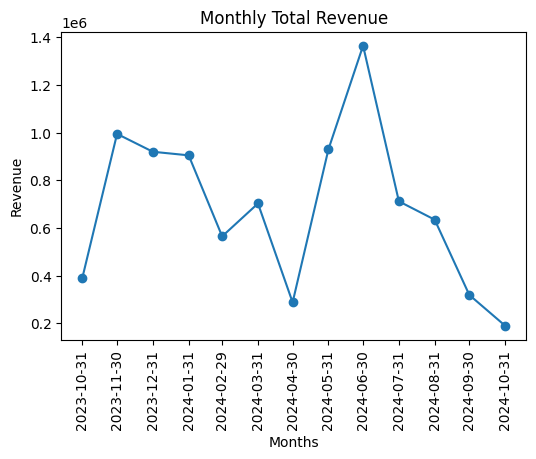

In [6]:
# 2. 월별 총 매출액을 집계하여 시각화하세요.
import matplotlib.pyplot as plt

# New dataframe that has OrderDate as its index
time_series_df = ecommerce_df.set_index('OrderDate')

# Monthly sales grouping
monthly_sales_df = time_series_df.resample('ME').agg(
    total_revenue = ('TotalRevenue', 'sum')
)
#display(monthly_sales_df)

# Plot
plt.figure(figsize=(6,4))
plt.plot(
    monthly_sales_df.index,      # x axis values
    monthly_sales_df['total_revenue'],   # y axi values
    marker = 'o'
)
plt.title("Monthly Total Revenue")
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.xticks(ticks=monthly_sales_df.index, rotation=90)
plt.show()

In [7]:
# 3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
# New df grouped by 'Category'
category_grouped_df = ecommerce_df.groupby('Category').agg(
    total_sales = ('TotalRevenue', 'sum')
)

# Sort according to 'total_sales'
sorted_category_grouped_df = category_grouped_df.sort_values('total_sales', ascending=False)

sorted_category_grouped_df.head(3)

,total_sales
Category,
Food,1966000
Electronics,1746000
Beauty,1493000


In [8]:
# 4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.
country_grouped_df = ecommerce_df.groupby('Country')['TotalRevenue'].sum()

sorted_countey_grouped_df = country_grouped_df.sort_values(ascending=False)
display(sorted_countey_grouped_df.head(3))

Country
미국    2238000
독일    1973000
중국    1766000
Name: TotalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [9]:
ecommerce_df.head(2) # Dataframe reminder

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:00:18,미국,0.14,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:00:45,독일,0.29,100000


In [10]:
# 1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
# Group by customer id
customer_grouped_df = ecommerce_df.groupby('CustomerID')['TotalRevenue'].sum()

# Sort (descending order)
sorted_customer_grouped_df = customer_grouped_df.sort_values(ascending=False)

# Top 5 customers
sorted_customer_grouped_df.head(5)

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64

In [22]:
# 2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
# Group by customer id -> count the number of orders -> sort (descending order)
order_count_by_customer_series = ecommerce_df.groupby('CustomerID').size()
sorted_count_series = order_count_by_customer_series.sort_values(ascending=False)

# top 5
sorted_count_series.head(10)

CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
1206    2
1508    2
1496    2
1673    2
1055    1
dtype: int64

In [ ]:
# 3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요. 
# 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

# Add 'Age' column (2025 ver.)
ecommerce_df['Age'] = 2025 - ecommerce_df['Birthdate'].dt.year 
#display(ecommerce_df.head(3))

# Helper function to decide which age group
def age_group(age):
    if age >= 60:
        return '60대 이상'
    elif 59 >= age and age >= 50:
        return '50대'
    elif 49 >= age and age >= 40:
        return '40대'
    elif 39 >= age and age >= 30:
        return '30대'
    elif 29 >= age and age >= 20:
        return '20대'
    else:
        return '10대 이하'
    

# Add ''AgeGroup' column (2025 ver.)
ecommerce_df['AgeGroup'] = ecommerce_df['Age'].map(age_group)

# Group by AgeGroup
age_group_category_cnt_df = ecommerce_df.groupby(['AgeGroup', 'Category']).agg(
    category_count= ('OrderID', 'count')
)
display(age_group_category_cnt_df)

# Leave the max count category for each age group
df_reset =  age_group_category_cnt_df.reset_index()
top_categories = df_reset.loc[df_reset.groupby('AgeGroup')['category_count'].idxmax()]
display(top_categories)


category_count
AgeGroup Category                   
20대      Beauty                    6
         Books                     2
         Clothing                  3
         Electronics               3
         Food                      5
         Sports                    4
30대      Beauty                    5
         Books                     6
         Clothing                  4
         Electronics               4
         Food                     11
         Sports                    5
40대      Beauty                    4
         Books                     8
         Clothing                  1
         Electronics               2
         Food                      4
         Sports                    6
50대      Beauty                    6
         Books                     5
         Clothing                  6
         Electronics               7
         Food                      2
         Sports                    2
60대 이상   Beauty                    2
         Books                     1
         Clothing                  1
         Electronics               3
         Food                      1
         Sports                    1

,AgeGroup,Category,category_count
0,20대,Beauty,6
10,30대,Food,11
13,40대,Books,8
21,50대,Electronics,7
27,60대 이상,Electronics,3


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.